# 🏠 Housing Price Prediction — Machine Learning Pipeline

This notebook builds a complete Machine Learning pipeline to predict housing prices using
Linear Regression. It includes:

- Data loading
- Feature engineering
- Categorical encoding
- Train–test split
- Model training and evaluation
- Visualization of predicted vs actual prices

The workflow uses **pandas**, **scikit-learn**, and **matplotlib**.


In [8]:
from google.colab import files

# Upload the CSV file from your local computer
uploaded = files.upload()


Saving Housing.csv to Housing (1).csv


## Step 2: Load the Dataset

We load the `Housing.csv` dataset using pandas and inspect the first 5 rows to understand its structure.


In [9]:
import pandas as pd
# Load the data
data = pd.read_csv("Housing.csv")

# Display the first 5 rows to check
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Step 3: Feature Engineering, Encoding, Model Training, and Evaluation

This step includes:
- Loading the dataset
- Feature engineering
- Encoding categorical features
- Train-test split
- Linear Regression model training
- Evaluation (MAE and MSE)
- Visualization of predicted vs actual prices


Mean Absolute Error (MAE): 968,955.21
Mean Squared Error (MSE): 1,750,199,539,815.30

First 10 predictions vs actual prices:
Actual: 4,060,000, Predicted: 5,169,497
Actual: 6,650,000, Predicted: 7,229,005
Actual: 3,710,000, Predicted: 3,111,185
Actual: 6,440,000, Predicted: 4,619,808
Actual: 2,800,000, Predicted: 3,293,036
Actual: 4,900,000, Predicted: 3,523,166
Actual: 5,250,000, Predicted: 5,600,501
Actual: 4,543,000, Predicted: 6,369,323
Actual: 2,450,000, Predicted: 2,724,920
Actual: 3,353,000, Predicted: 2,630,525


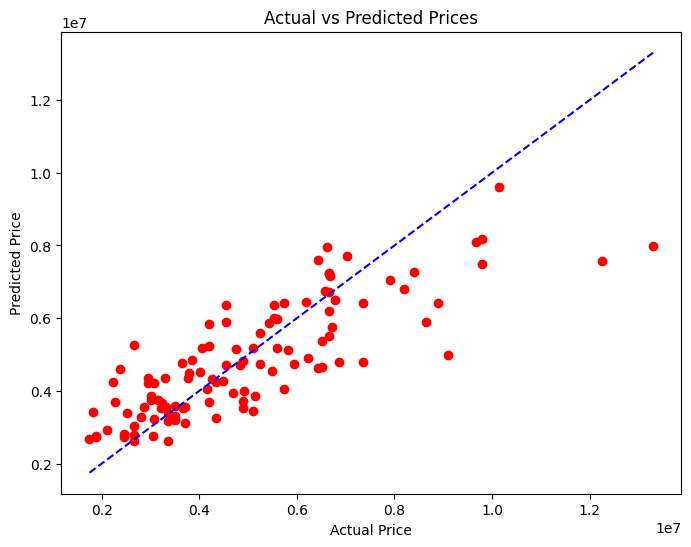

In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Separate features and target
X = data.drop("price", axis=1)  # features
y = data["price"]               # target

# Feature Engineering
X['guestroom_num'] = X['guestroom'].map({'yes': 1, 'no': 0})
X['total_rooms'] = X['bedrooms'] + X['bathrooms'] + X['guestroom_num']
X['area_per_story'] = X['area'] / X['stories']
X = X.drop('guestroom_num', axis=1)

# Categorical Encoding
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                        'airconditioning', 'prefarea', 'furnishingstatus']

preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_features)],
    remainder='passthrough'  # keep numeric columns as-is
)

X_transformed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42
)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Squared Error (MSE): {mse:,.2f}\n")

# Print first 10 predictions vs actual values
print("First 10 predictions vs actual prices:")
for actual, pred in zip(y_test[:10], y_pred[:10]):
    print(f"Actual: {actual:,.0f}, Predicted: {pred:,.0f}")

# Visualization
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--')
plt.show()
